In [5]:
### Load tikzpy library
import tikzpy as py_tikZ

### Load main object
tikZ = py_tikZ.pytikz()

### Add point at x=0, y=0, z=0
p1 = tikZ.pto.pto(0.1,0.2,0.3, layer=0, alias='pto1')

p2 = tikZ.pto.pto(1.1,1.2,1.3, layer=0, alias='pto2')
print( p2)

### How to call a point?
p3 = tikZ.pto.pto(1.1,1.2,1.3, layer=0, alias='pto3')
print(  p3.id == tikZ.pto.alias('pto3').id) #Is True
print(  p3.id == tikZ.pto[p3.id].id )#Is True
print(  p3.id == (p3*2).id) #Is False

### How to make ne point?
p4 = tikZ.pto.pto(1.2,1.3,1.4, layer=0, alias='pto4')
print( p4)
p5 = p4 # Assignment by reference (same pointer)
print( p5)
p5 = p4.copy() # Copy a new point with no alias
print( p5)
p5 = p4.copy('pto5') # Copy a new point with alias
print( p5)

### Operations return an axuiliary point
p2 = p2 + 1 #p2 becomes an auxiliary point
print( p2, p2.id == tikZ.pto.alias('pto2').id)

### To modify the point coord use .xyz
p2 = tikZ.pto.alias('pto2')
p2.xyz = p2 + 1
print( p2, p2.id == tikZ.pto.alias('pto2').id)
p2.xyz = p2 + 1
print( p2, p2.id == tikZ.pto.alias('pto2').id)

Point key:#1 x=1.1000 y=1.2000 z=1.3000 layer=0 alias=pto2 NumPoints:2
True
True
False
Point key:#3 x=1.2000 y=1.3000 z=1.4000 layer=0 alias=pto4 NumPoints:4
Point key:#3 x=1.2000 y=1.3000 z=1.4000 layer=0 alias=pto4 NumPoints:4
Point key:#4 x=1.2000 y=1.3000 z=1.4000 layer=0 alias= NumPoints:5
Point key:#5 x=1.2000 y=1.3000 z=1.4000 layer=0 alias=pto5 NumPoints:6
Point key:None x=2.1000 y=2.2000 z=2.3000 layer=0 alias= NumPoints:6 False
Point key:#1 x=2.1000 y=2.2000 z=2.3000 layer=0 alias=pto2 NumPoints:6 True
Point key:#1 x=3.1000 y=3.2000 z=3.3000 layer=0 alias=pto2 NumPoints:6 True


tikzpy number points 300, number shapes 900


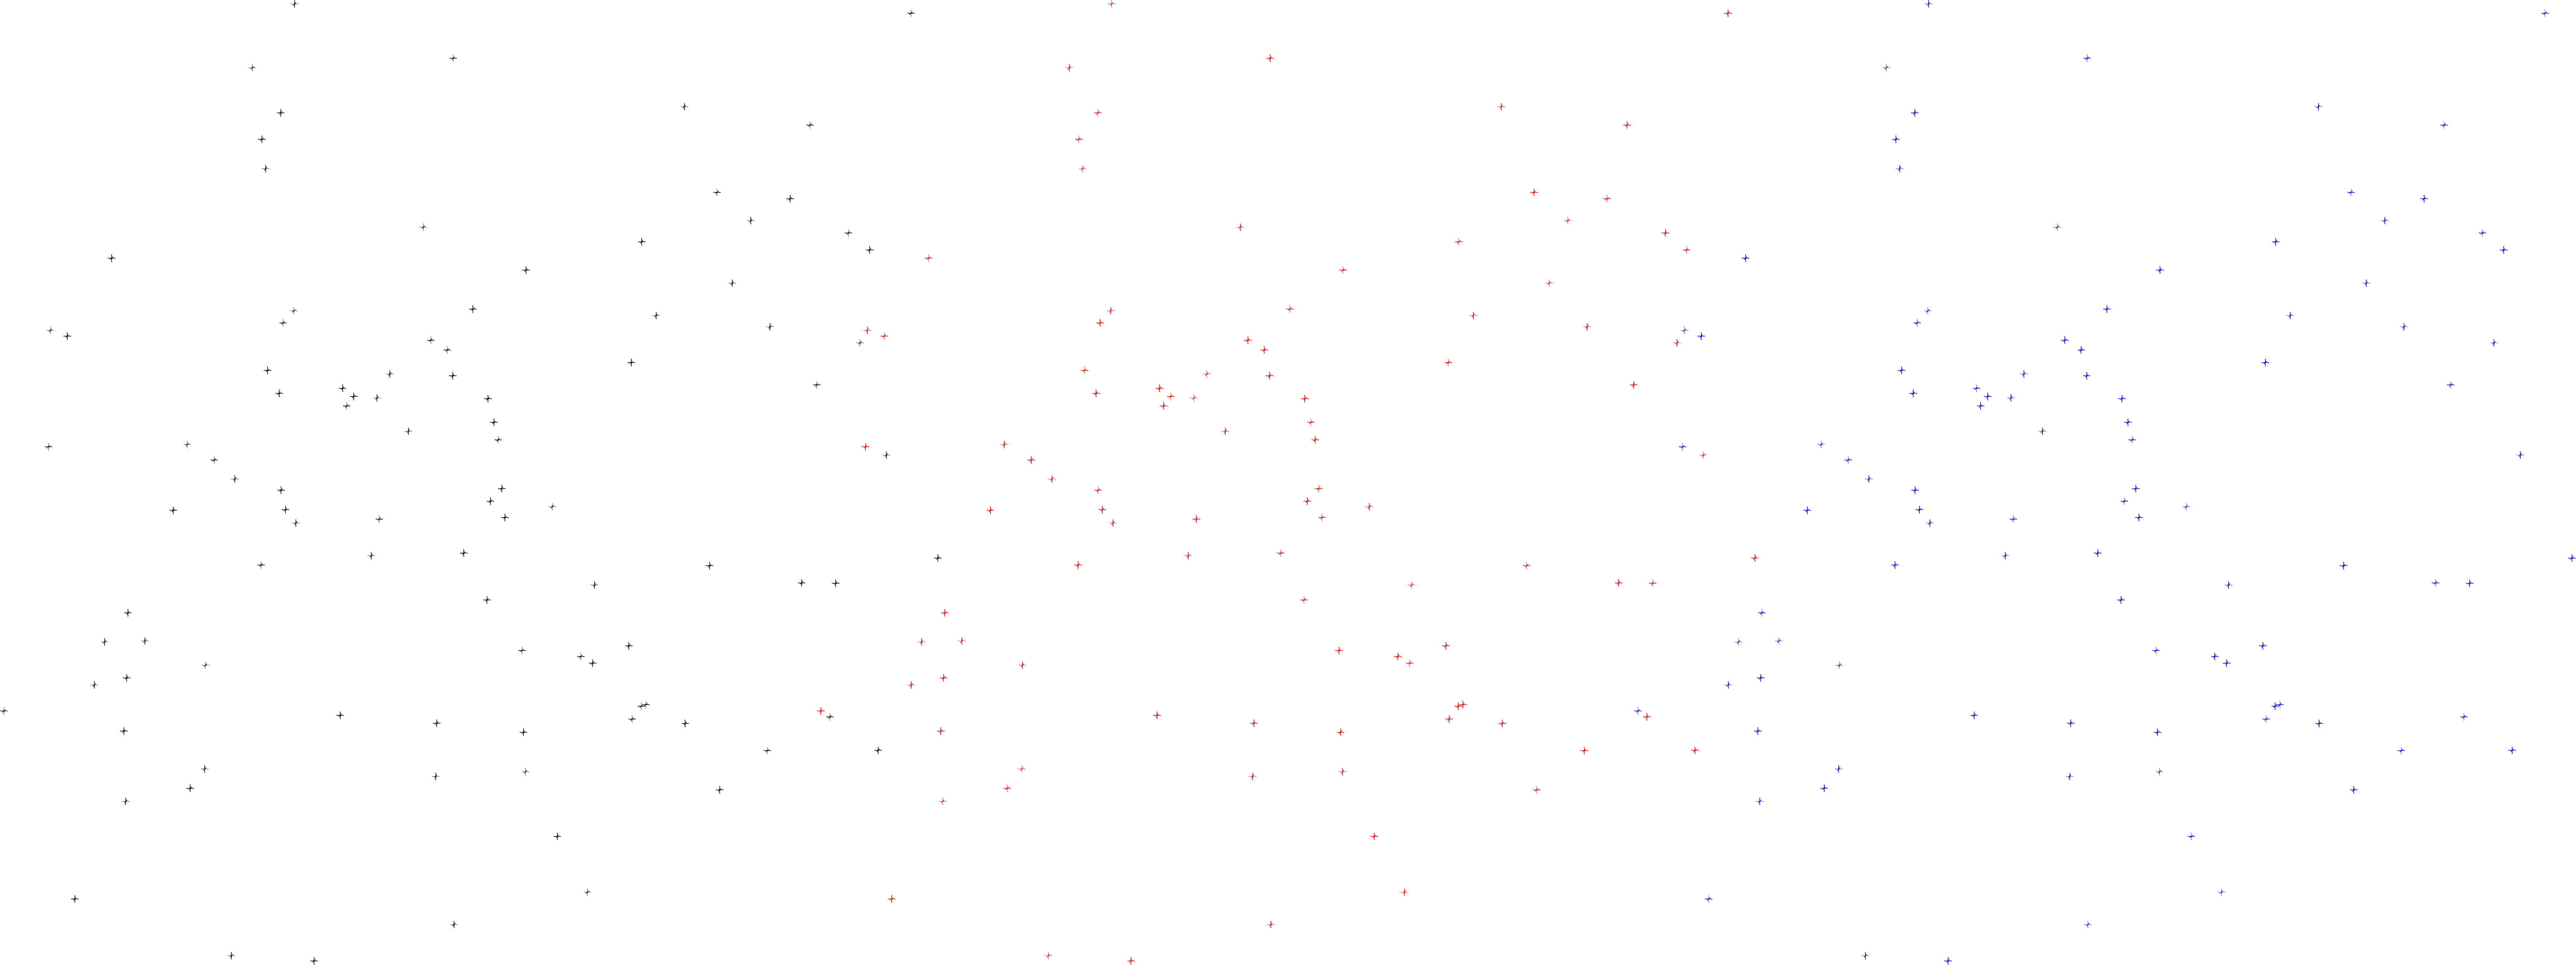

In [3]:
### Load tikzpy library
import tikzpy as py_tikZ
import random, os, sys

### Load main object
tikZ = py_tikZ.load()

### Create a cloud of points
max_number = 100
radius = 10
ptos = []

for i in range(0,max_number):
    ### Random points
    x, y, z = random.uniform(-radius, radius), \
              random.uniform(-radius, radius), \
              random.uniform(-radius, radius)
              
    ### Create a point
    p = tikZ.pto.pto(x, y, z, layer=0, alias='pto%i' %i)
    
    ### List of points
    ptos.append(p.id)

ptosB = tikZ.pto.copy(ptos, alias_prefix = "B-")
ptosC = tikZ.pto.copy(ptos, alias_prefix = "C-")

tikZ.pto.translate(ptosB, x=(2*radius)*1.1)
tikZ.pto.translate(ptosC, x=(4*radius)*1.1)

#tikZ.pto.rotate(ptosC, pto_rotation = None, Ax = 0., Ay = 0., Az = 0.)
    
### Show points
tikZ.pto.draw_points(ptos, color = "black")
tikZ.pto.draw_points(ptosB, color = "red")
tikZ.pto.draw_points(ptosC, color = "blue")

### Make drawing
path = os.getcwd()
name = "plot1"
plot_path = tikZ.save_pdf(path, name, as_png=True, as_eps=True)

path = os.path.dirname(plot_path)
name = os.path.basename(plot_path)

img_path = os.path.join(path,name[:-4]+".png")

from IPython.display import Image
Image(filename=img_path) 

['default', 'diagonal_sym']
tikzpy number points 100, number shapes 200


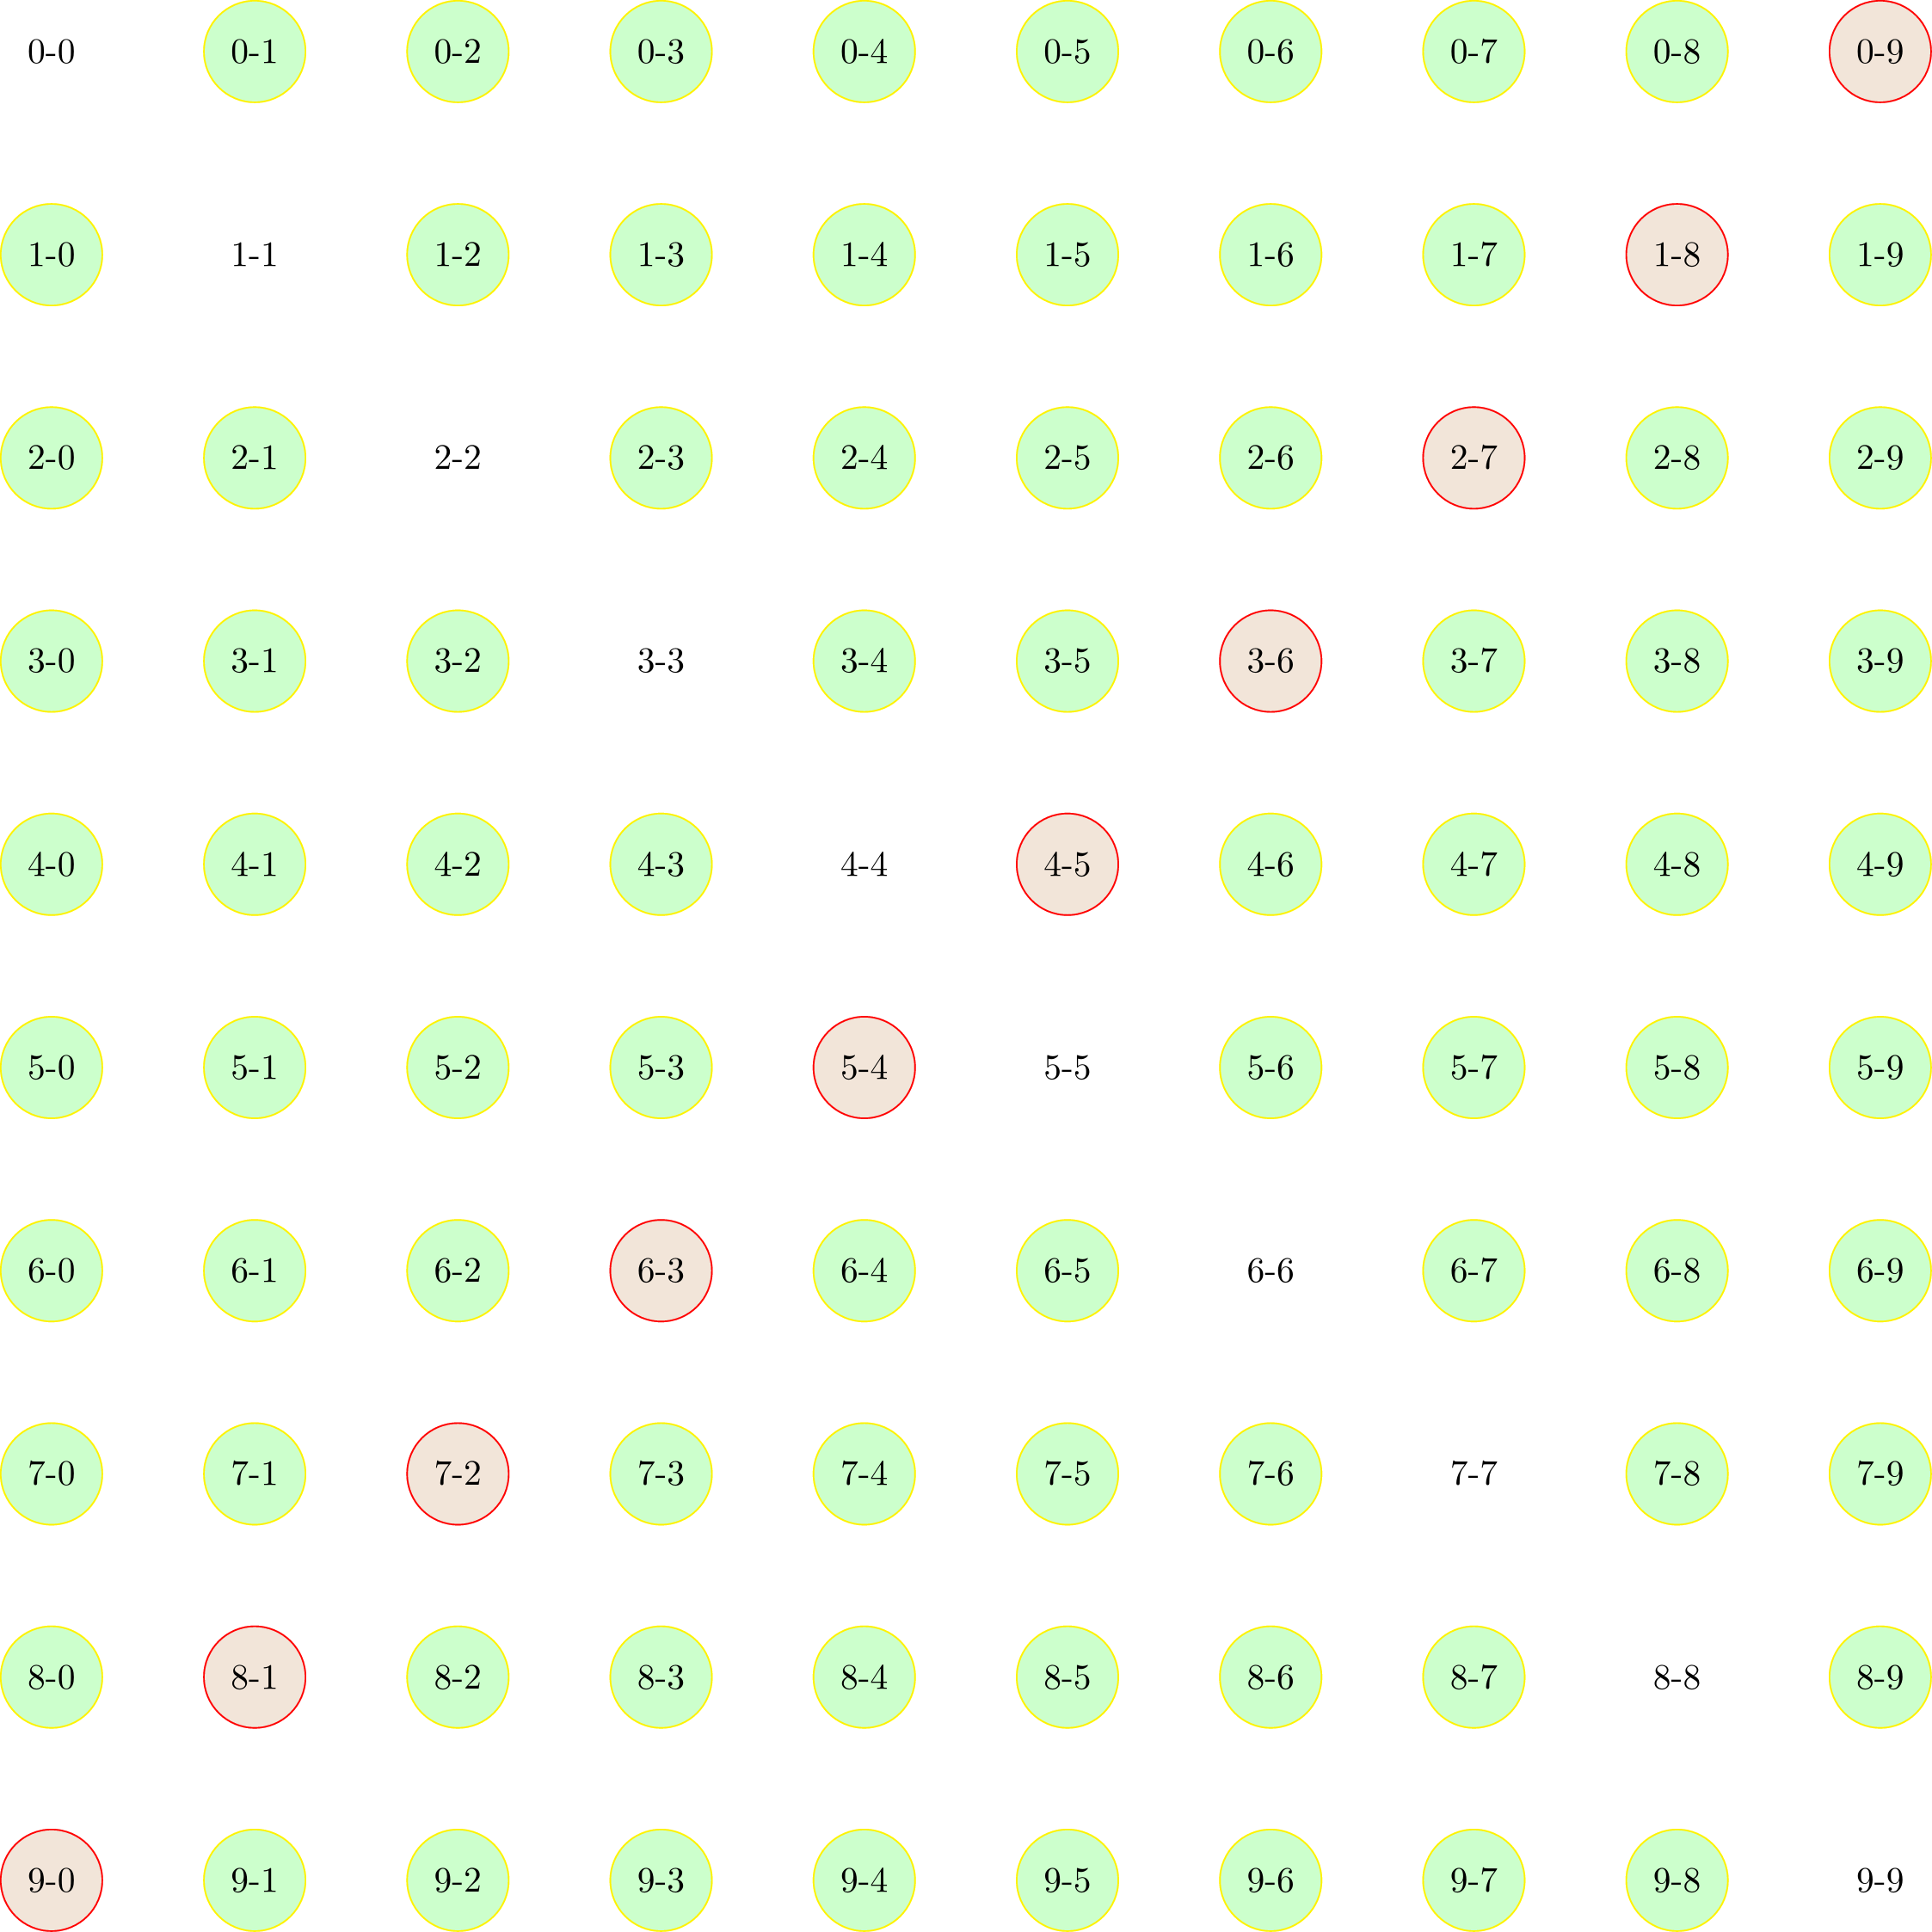

In [4]:
### Load tikzpy library
import tikzpy as py_tikZ
import os, sys

### Load main object
tikZ = py_tikZ.load()

### Create a cloud of points
rows = 10
columns = rows
sep = 2


for i in range(0,rows):

    for j in range(0,columns):

        x, y, z = j * sep, -i * sep, 0

        p = tikZ.pto.pto(x, y, z, layer=0, alias='pto_%i_%i' % (i,j))

        c = tikZ.shp.circle(p, sep/4., color = "yellow", fill = "green!20")

        t = tikZ.shp.text(p, r'%i-%i' % (i,j))
        t.zorder = 10

        if i==j:
            c.addlabel = "diagonal"
            c.dellabel = "default"

        if i+j==rows-1 and i!=j:
            c.addlabel = "diagonal_sym"
            c.dellabel = "default"

### Hide diagonals
tikZ.lbl.set_active_labels("diagonal", active=False)
# Show acive labels
print( tikZ.lbl.list_active_labels(active=True))

### Change color symetric diagonal
shps = tikZ.lbl.shapes_by_label("diagonal_sym")
tikZ.shp.color_to_shapes(shps, "red")
tikZ.shp.fill_to_shapes(shps, "brown!20")

### Make drawing
path = os.getcwd()
name = "plot2"
plot_path = tikZ.save_pdf(path, name, as_png=True, as_eps=True)

path = os.path.dirname(plot_path)
name = os.path.basename(plot_path)

img_path = os.path.join(path,name[:-4]+".png")

from IPython.display import Image
Image(filename=img_path) 